# Fase di pulizia e analisi dataset

Eseguiamo nuove operazioni di pulizia del dataset, in particolare:
- rimozione di caratteri speciali
- rimozione di stopwords
- rimozione di numeri
- lemmatizzazione

Gli altri notebook partono dall'output di questo notebook.

## Pulizia 


In [ ]:
#circa 7min di esecuzione con modello già caricato

#loading and cleaning dataset with spacy
import spacy
import pandas as pd
import regex as re

def cleaner(s):
    #removing numbers and special caracters
    s = re.sub(r'[^a-z\s]', '', s).strip()

    #removing multiple spaces
    s = " ".join(s.split()).strip()

    #some manual corrections
    s = s.replace(' accino', ' vaccino')

    #lemmatization with spacy
    doc = nlp(s)
    return " ".join([token.lemma_ for token in doc if not token.is_stop]).strip()

def remove_stopwords(s):
    doc = nlp(s)
    return " ".join([token.text for token in doc if not token.is_stop]).strip()

'''
load_stopwords_list(file_path: str) -> list
    Load stopwords from a file containing one stopword per line.
'''
def load_stopwords_list(file_path = "data/it_stopwords_kaggle.txt"):
    with open(file_path, 'r') as f:
        return f.read().splitlines()

#carichiamo il modello
nlp = spacy.load("it_core_news_md")

#load pandas dataframe
vax_df = pd.read_csv('data/posts_cleaned_it_only.csv')

#load stopwords and adding to the model
italian_stopwords = load_stopwords_list()
for stopword in italian_stopwords:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True


#selezioniamo solo la colonna clean_text
vax_df = vax_df['clean_text']

#applichiamo la funzione di pulizia
vax_df_cleaned = vax_df.apply(cleaner)
#è necessario applicare nuovamente la funzione per rimuovere le stopwords che sono state aggiunte dalla lemmatizzazione
vax_df_cleaned = vax_df_cleaned.apply(remove_stopwords)

#esportiamo il dataset pulito in formato csv 
vax_df_cleaned.to_csv('data/posts_ULTRAcleaned_it_only_spacy.csv', index=False)

## Analisi del dataset  

Eseguire sempre prima la cella con import!

In [6]:
#import analisi del dataset (ESEGUIRE SEMPRE)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

Parole più frequenti nel dataset:


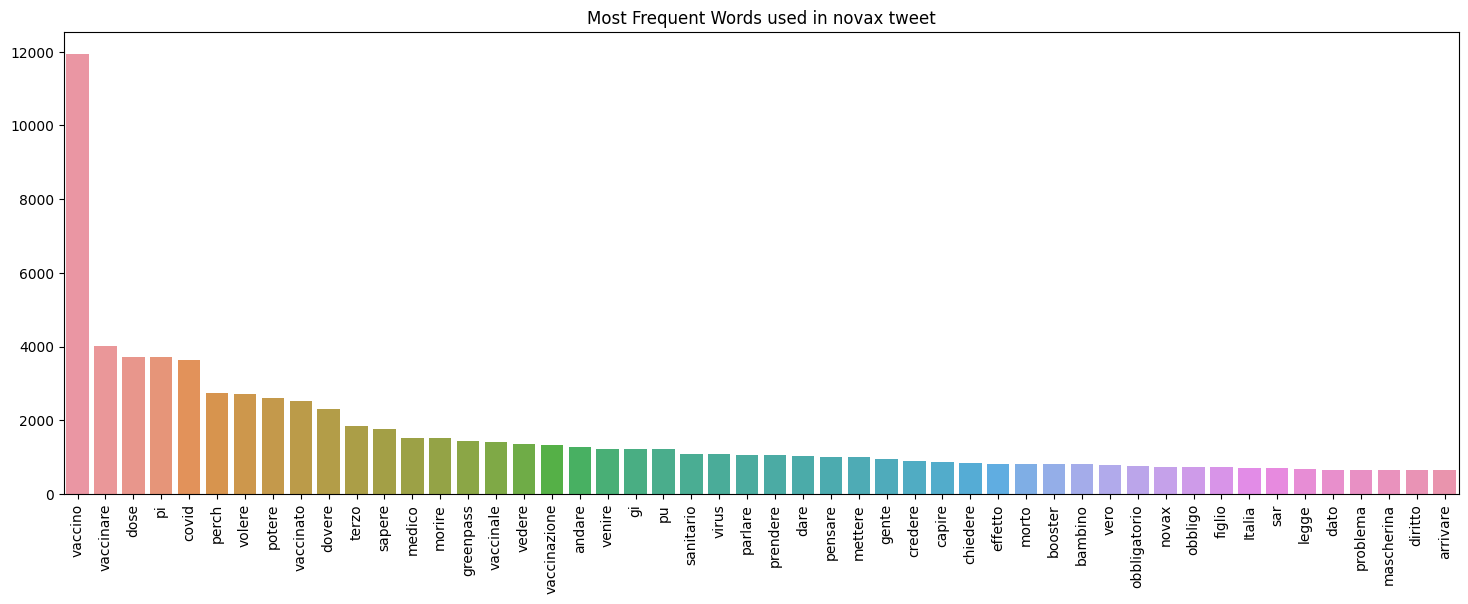

Numero di caratteri:
count    19097.000000
mean       177.543960
std        300.919131
min          2.000000
25%         53.000000
50%         99.000000
75%        171.000000
max       2861.000000
Name: char_count, dtype: float64


In [5]:
# PAROLE PIÙ FREQUENTI



#load pandas dataframe (rimuovo le righe vuote che putroppo sono presenti)
vax_series = pd.read_csv('data/posts_ULTRAcleaned_it_only_spacy.csv')
vax_series.dropna(inplace=True)

#contiamo le parole
aggregate_counter = Counter()
for row in vax_series["clean_text"]:
    c = Counter(row.split())
    aggregate_counter += c

common_words = [word[0] for word in aggregate_counter.most_common(50)]
common_words_counts = [word[1] for word in aggregate_counter.most_common(50)]

#disegnamo i grafici
def barplot(words, words_counts, title):
    fig = plt.figure(figsize=(18,6))
    bar_plot = sns.barplot(x=words, y=words_counts)
    for item in bar_plot.get_xticklabels():
        item.set_rotation(90)
    plt.title(title)
    plt.show()

print("Parole più frequenti nel dataset:")
barplot(words=common_words, words_counts=common_words_counts, title='Most Frequent Words used in novax tweet')




Numero di caratteri:
count    19097.000000
mean       177.543960
std        300.919131
min          2.000000
25%         53.000000
50%         99.000000
75%        171.000000
90%        325.000000
95%        569.000000
99%       1935.080000
max       2861.000000
Name: char_count, dtype: float64


<AxesSubplot: title={'center': 'Number of characters in tweets'}, ylabel='Frequency'>

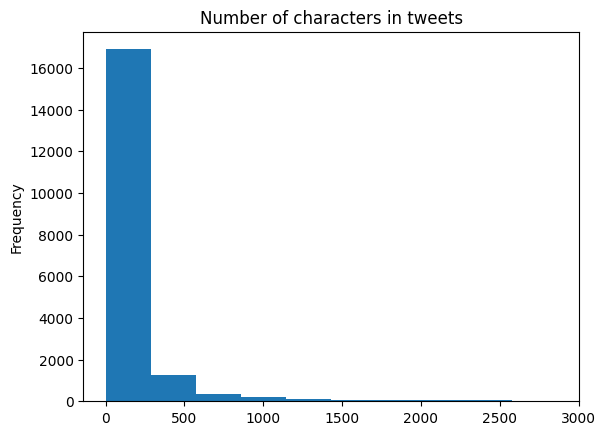

In [19]:
# NUMERO DI CARATTERI

print("Numero di caratteri:")
vax_series['char_count'] = vax_series['clean_text'].apply(len)
print(vax_series['char_count'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

#disegnamo il grafico
vax_series['char_count'].plot.hist(bins=10, title='Number of characters in tweets')

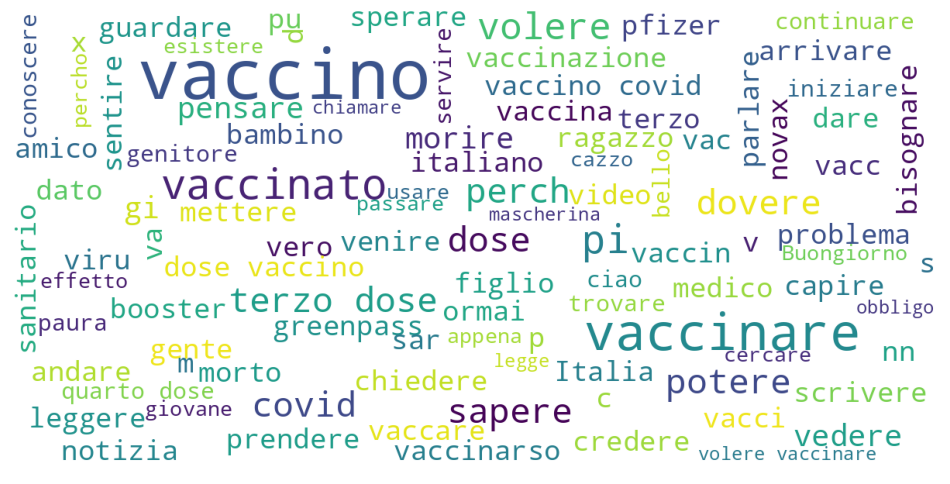

In [27]:
# WORDCLOUD

from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        #stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data) )

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(vax_series['clean_text'].to_string())